**Oasis InfoByte**

**Data Science Internship Tasks**

**Task 3) "Car Price Prediction Model" by ABU BAKAR SIDDIQ**

**This is Car Price Prediction Model using a RandomForestRegressor. It starts by encoding categorical features and scaling numerical features of the DataSet. The model is trained on split data, and performance metrics (MAE, MSE, RMSE, and R²) are evaluated. Visualization includes comparing actual vs. predicted prices, and a pie chart for correct vs. false predictions. It also have a recommendation function allows users to input car details interactively and predicts the car’s selling price based on the trained model.**

**Importing all Necessary Libraires**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading DataSet**

In [83]:
data = pd.read_csv('car data.csv')

**Discovering DataSet**

In [84]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [85]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [86]:
data.shape

(301, 9)

In [87]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**Having separate LabelEncoders for all Categorical Features**

In [88]:
le_fuel_type = LabelEncoder()
le_selling_type = LabelEncoder()
le_transmission = LabelEncoder()

data['Fuel_Type'] = le_fuel_type.fit_transform(data['Fuel_Type'])
data['Selling_type'] = le_selling_type.fit_transform(data['Selling_type'])
data['Transmission'] = le_transmission.fit_transform(data['Transmission'])

**Doing Feature Scaling**

In [89]:
scaler = StandardScaler()
data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']])

**Splitting Features & Target**

In [90]:
X = data.drop(columns=['Car_Name', 'Selling_Price'])
y = data['Selling_Price']

**Splitting DataSet**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training Model**

In [92]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Prediction on Test-Set**

In [93]:
y_pred = model.predict(X_test)

**Evaluation Metrics**

In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE: ",(mae))
print("MSE: ",(mse))
print("RMSE: ",(rmse))
print("R2 Score: ",(r2))

MAE:  0.6171180327868853
MSE:  0.851238144918032
RMSE:  0.9226256797412654
R2 Score:  0.963046818101436


**Comparing Actual vs Predicted Prices**

In [95]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

     Actual  Predicted
177    0.35     0.4403
289   10.11    11.0518
228    4.95     4.8970
198    0.15     0.2091
60     6.95     7.6840


**Visualizing Actual vs Predicted Prices**

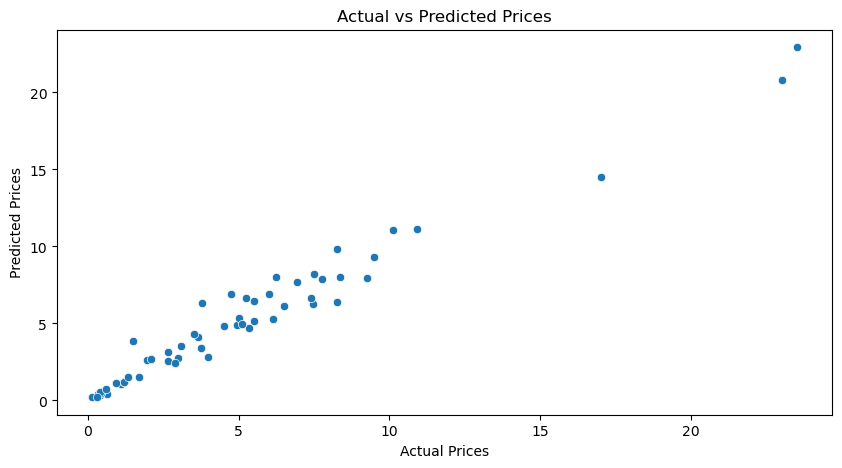

In [96]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**Correct vs Incorrect Predictions Visualization**

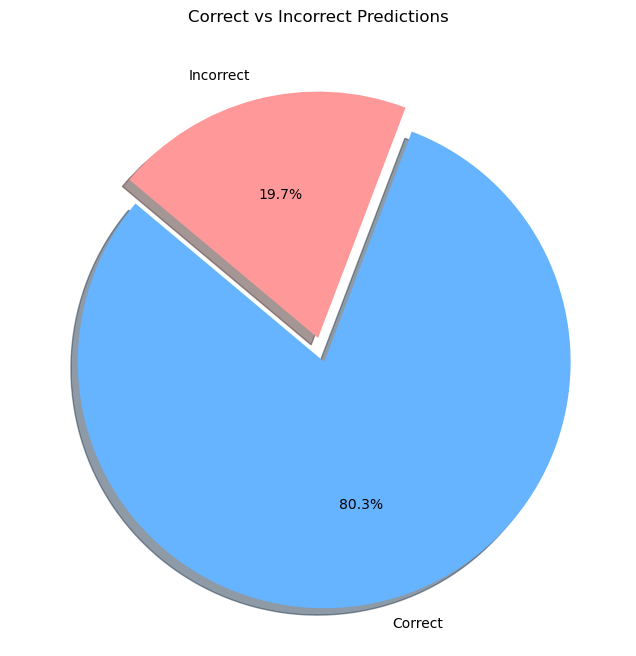

In [97]:
false_predictions = len(y_test) - correct_predictions

labels = ['Correct', 'Incorrect']
sizes = [correct_predictions, false_predictions]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Correct vs Incorrect Predictions')
plt.show()

**Some Additional Visualizations**

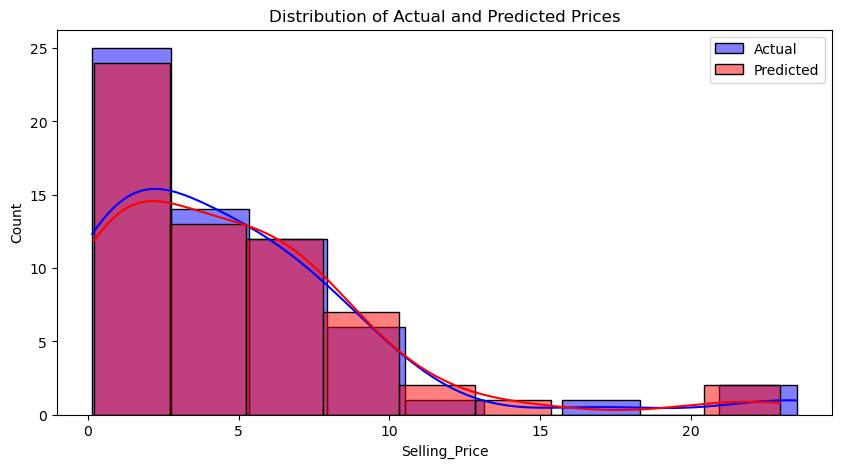

In [98]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test, kde=True, color='blue', label='Actual')
sns.histplot(y_pred, kde=True, color='red', label='Predicted')
plt.legend()
plt.title('Distribution of Actual and Predicted Prices')
plt.show()

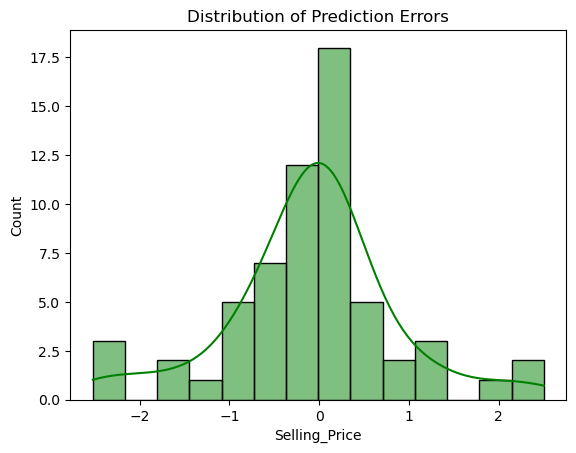

In [99]:
sns.histplot(y_test - y_pred, kde=True, color='green')
plt.title('Distribution of Prediction Errors')
plt.show()

**Car Price Prediction Model will Predict a Car based at Runtime according to User-Input**

In [100]:
def recommend_car(model, le_fuel_type, le_selling_type, le_transmission, scaler):
    
    print("Please Tell This Model Your Requirements, & Model will Predict a Car for You:")
    year = int(input("Year of manufacture (e.g., 2015): "))
    present_price = float(input("Present Price of the car (e.g., 5.5): "))
    driven_kms = float(input("Total Kilometers driven (e.g., 30000): "))
    
    fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ").capitalize()
    selling_type = input("Selling type (Dealer/Individual): ").capitalize()
    transmission = input("Transmission type (Manual/Automatic): ").capitalize()
    owner = int(input("Number of Previous Owners (e.g., 0, 1, 2, 3): "))
    
    try:
        fuel_type_encoded = le_fuel_type.transform([fuel_type])[0]
        selling_type_encoded = le_selling_type.transform([selling_type])[0]
        transmission_encoded = le_transmission.transform([transmission])[0]
    except ValueError as e:
        print(f"Error: {e}. Kindly ensure the input values are correct.")
        return

    scaled_features = scaler.transform(pd.DataFrame({
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms]
    }, columns=['Present_Price', 'Driven_kms']))
    
    present_price_scaled = scaled_features[0, 0]
    driven_kms_scaled = scaled_features[0, 1]

    input_data = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price_scaled],
        'Driven_kms': [driven_kms_scaled],
        'Fuel_Type': [fuel_type_encoded],
        'Selling_type': [selling_type_encoded],
        'Transmission': [transmission_encoded],
        'Owner': [owner]
    })
    
    predicted_price = model.predict(input_data)
    print(f"The recommended selling price for the car is: {predicted_price[0]:.2f} Lac\n--------------------Thank You!!!-----------------------")

recommend_car(model, le_fuel_type, le_selling_type, le_transmission, scaler)


Please Tell This Model Your Requirements, & Model will Predict a Car for You:


Year of manufacture (e.g., 2015):  2016
Present Price of the car (e.g., 5.5):  7.5
Total Kilometers driven (e.g., 30000):  27000
Fuel Type (Petrol/Diesel/CNG):  Petrol
Selling type (Dealer/Individual):  Individual
Transmission type (Manual/Automatic):  Automatic
Number of Previous Owners (e.g., 0, 1, 2, 3):  2


The recommended selling price for the car is: 5.70 Lac
--------------------Thank You!!!-----------------------
